In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
sns.reset_defaults()
sns.set_theme(style="darkgrid")
sns.set_palette("colorblind")


#verry important
os.chdir(r"C:/Users/nieli/Documents/uva/thesis/code/")
print(os.getcwd())

C:\Users\nieli\Documents\uva\thesis\code


In [2]:
wouter_folder = 'PPA/results/wouter_results/'

### 8 nd benchmarks

In [3]:
df = pd.DataFrame(columns=['benchmark','median_val','dimension'])
i = 0
for filename in os.listdir(wouter_folder):
    
    benchmark = filename.split('-')[0]
    dimension = filename.split('-')[1].split('.')[0]
    test = filename
    median_val = pd.read_csv(f'{wouter_folder}{filename}', header=0, dtype={'Repetition':int,'Value@10k':float}, names=['run_n','obj_val']).median()[1]
    df = df.append({'benchmark':benchmark, 'median_val':median_val,'dimension':dimension}, ignore_index=True)

    
#     df = df.append({}), ignore_index=True)


### 1 nd benchmark

In [4]:
rastrigin_files = 'PPA/results/wouter_results_faulty/rastrigin'

In [5]:
for filename in os.listdir(rastrigin_files):
    
    dimension = filename.replace('d','')
    bests = []
    for run in os.listdir(f'{rastrigin_files}/{filename}'):
        
        temp = pd.read_csv(f'{rastrigin_files}/{filename}/{run}')
        bests.append(temp[-1:].curbest.values[0])
    
    df = df.append({'benchmark':'rastrigin','median_val':np.median(bests),'dimension':dimension}, ignore_index=True)
    
    
    

### 2D benchmarks

In [7]:
faulty_folder = 'PPA/results/wouter_results_faulty/'
df_2d = pd.DataFrame(columns=['benchmark','median_val','dimension'])
for benchmark in os.listdir(faulty_folder):
    if benchmark == 'rastrigin':
        break
    for filename in os.listdir(f'PPA/results/wouter_results_faulty/{benchmark}'):
        
        
        dimension = filename.replace('d','')
        bests = []
        for run in os.listdir(f'{faulty_folder}/{benchmark}/{filename}'):
            
            temp = pd.read_csv(f'{faulty_folder}/{benchmark}/{filename}/{run}')
            bests.append(temp[-1:].curbest.values[0])
        
        df_2d = df_2d.append({'benchmark': benchmark,'median_val':np.median(bests),'dimension':dimension}, ignore_index=True)
    
    

In [8]:
df.to_csv('PPA/results/cleaned_wouter/cleaned_wouter.csv', index=False)
df_2d.to_csv('PPA/results/cleaned_wouter/2d_cleaned_wouter.csv', index=False)

### you need to subtract the kown optimum from wouters results for optima > 0

In [9]:
wouter_df = pd.read_csv('PPA/results/cleaned_wouter/cleaned_wouter.csv')
my_df = pd.read_csv('PPA/results/cleaned_wouter/my_nd.csv')
my_df['benchmark'] = my_df['benchmark'].str.lower()
my_df =  my_df.replace('rastrigrin','rastrigin')

In [73]:
# my_df['wouter_val'] = np.nan

In [10]:
for b in my_df.benchmark.unique():
    for d in my_df.dimensions.unique():       
        my_df.loc[(my_df.benchmark == b)&(my_df.dimensions == d),'wouter_val'] = wouter_df.loc[(wouter_df['benchmark'] == b)&(wouter_df.dimension == d)].median_val.values[0]
        
my_df = my_df.sort_values(['benchmark','dimensions'])
wouter_df = wouter_df.sort_values(['benchmark','dimension'])
my_df['difference'] = abs(my_df['error'] - my_df['wouter_val'])


In [11]:
merge_df = pd.merge(my_df,wouter_df, left_on=['benchmark','dimensions'],right_on=['benchmark','dimension'])
merge_df['difference'] = abs(merge_df['error'] - merge_df['median_val'])
merge_df['percent_diff'] = abs((merge_df.error / merge_df.median_val) - 1)

In [12]:
merge_df.loc[merge_df['percent_diff'] > 0.05,'significant'] = 1
merge_df.loc[merge_df['percent_diff'] <= 0.05,'significant'] = 0
sum(merge_df['significant'] )
# merge_df
# merge_df['percent_diff'] = 1 if (merge_df['percent_diff'] > 0.05) else 0

33.0

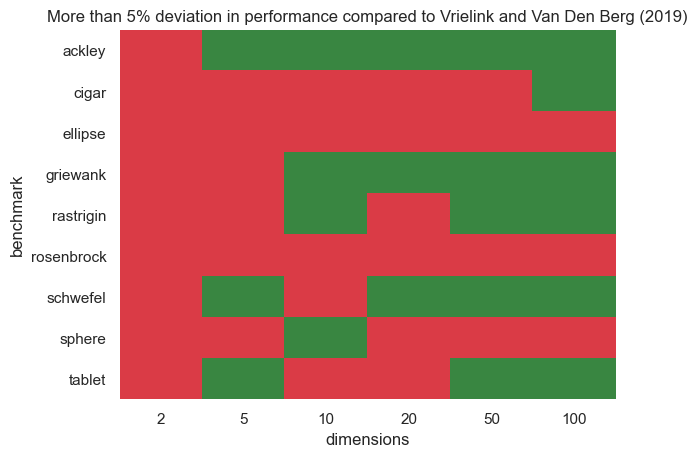

In [15]:
wouter_df_2d = pd.read_csv('PPA/results/cleaned_wouter/2d_cleaned_wouter.csv')

In [18]:
bests

[0.0003525992644614,
 0.0003173017296705,
 0.0003622269501455,
 0.0001070423600074,
 0.0010159163784151,
 0.0006158373841079,
 0.0002771755431361,
 0.0001557295811993,
 0.0001436651416009,
 0.0001554550197772,
 0.0004866139657885,
 0.0003285497841939,
 0.0001211067730572,
 0.00055440574981,
 8.873016500235275e-05,
 0.0001181168056236,
 0.0001518246287163,
 0.0003178777777097,
 0.0010913698703242,
 8.658500109552586e-05]

In [22]:

shapiro_test = stats.wilcoxon(bests)
shapiro_test

WilcoxonResult(statistic=0.0, pvalue=1.9073486328125e-06)

In [2]:
from scipy import stats

In [3]:
pretty_names = {
    'ackley':'Ackley',
    'branin':'Branin',
    'cigar':'Cigar',
    'easom':'Easom',
    'ellipse':'Ellipse',
    'goldstein_price':'Goldstein-Price',
    'griewank':'Griewank',
    'martin_gaddy':'Martin-Gaddy',
    'rastrigin':'Rastrigin',
    'rosenbrock':'Rosenbrock',
    'schwefel':'Schwefel',
    'six_hump_camel':'Six-Hump-Camel',
    'sphere':'Sphere',
    'tablet':'Tablet'
}

In [8]:
wouter_folder = 'PPA/results/wouter_results/'
wouter_df = pd.DataFrame(columns=['run_n','benchmark','dimensions','best_objval'])
i = 0
for filename in os.listdir(wouter_folder):
    
    benchmark = filename.split('-')[0]
    dimension = filename.split('-')[1].split('.')[0]
    
    temp_df = pd.read_csv(f'{wouter_folder}{filename}', header=0, dtype={'Repetition':int,'Value@10k':float}, names=['run_n','best_objval'])
    temp_df['dimensions'] = int(dimension)
    temp_df['benchmark'] = benchmark
    
    wouter_df = wouter_df.append(temp_df, ignore_index=True)
    

rastrigin_files = 'PPA/results/wouter_results_faulty/rastrigin'
rast_df = pd.DataFrame(columns=['run_n','benchmark','dimensions','best_objval'])

for filename in os.listdir(rastrigin_files):
    
    dimension = int(filename.replace('d',''))
    
    for run in os.listdir(f'{rastrigin_files}/{filename}'):
        
        temp = pd.read_csv(f'{rastrigin_files}/{filename}/{run}')
        run_n = run.replace('.csv','')
        rast_df = rast_df.append({'run_n':run_n,'benchmark':'rastrigin','best_objval':temp[-1:].curbest.values[0],'dimensions':dimension}, ignore_index=True)
    
wouter_df = wouter_df.append(rast_df, ignore_index=True)

faulty_folder = 'PPA/results/wouter_results_faulty/'
df_2d = pd.DataFrame(columns=['run_n','benchmark','dimensions','best_objval'])
for benchmark in os.listdir(faulty_folder):
    
    if benchmark == 'rastrigin':
        continue
    for filename in os.listdir(f'PPA/results/wouter_results_faulty/{benchmark}'):
        
        dimension = int(filename.replace('d',''))
        for run in os.listdir(f'{faulty_folder}/{benchmark}/{filename}'):
            run_n = run.replace('.csv','')
            temp = pd.read_csv(f'{faulty_folder}/{benchmark}/{filename}/{run}')
            df_2d = df_2d.append({'run_n':run_n,'benchmark': benchmark,'best_objval':temp[-1:].curbest.values[0],'dimensions':dimension}, ignore_index=True)
        
wouter_df = wouter_df.append(df_2d, ignore_index=True)

In [135]:
my_df = pd.read_csv('PPA/results/my_results_rep/my_results-thesis.csv').rename(columns={'benchmark_name':'benchmark','best_during run':'best_objval'})
my_df['benchmark'] = my_df['benchmark'].str.lower()
my_df = my_df.replace({'rastrigrin':'rastrigin','martin-gaddy':'martin_gaddy', 'six-hump-camel':'six_hump_camel','goldstein-price':'goldstein_price'})

In [103]:
# new_df = my_df

In [125]:
set_1

,run_n,benchmark,dimensions,best_objval
870,1,tablet,5,102.162019
871,9,tablet,5,197.031566
872,8,tablet,5,5.067062
873,7,tablet,5,226.836265
874,6,tablet,5,115.319819
875,0,tablet,5,50.787917
876,5,tablet,5,36.928371
877,3,tablet,5,129.208977
878,2,tablet,5,98.177999
879,14,tablet,5,18.720322


### A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis.

p-values > 0.05 mean the null hypothesis is true, indicating that the samples come from the same population

In [136]:
stats_df = pd.DataFrame(columns=['benchmark','dimensions','greater_than'])
for benchmark in my_df.benchmark.unique():
    for dimension in my_df[my_df['benchmark'] == benchmark].dimensions.unique():
        set_1 = my_df[(my_df['benchmark'] == benchmark) & (my_df['dimensions'] == dimension)]
        set_2 = wouter_df[(wouter_df['benchmark'] == benchmark) & (wouter_df['dimensions'] == dimension)]
        
        #remove the furthest outliers from set_2 to get the same size
#         set_2_mean = set_2.mean().best_objval
#         set_2['distance_to_mean'] = abs(set_2_mean - set_2['best_objval'])
#         set_2 = set_2.sort_values('distance_to_mean', ascending=False)[5:]
        
        greater_than = stats.mannwhitneyu(set_1['best_objval'], set_2['best_objval']).pvalue > 0.05
        
        stats_df = stats_df.append({'benchmark':benchmark,'dimensions':dimension,'greater_than':greater_than}, ignore_index=True)

C:\Users\nieli\miniconda3\envs\ppa_data_vis\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\nieli\miniconda3\envs\ppa_data_vis\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


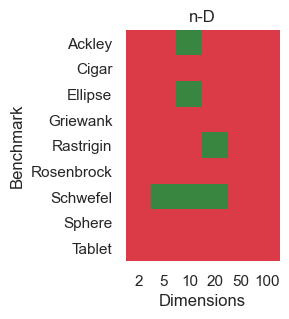

C:\Users\nieli\miniconda3\envs\ppa_data_vis\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


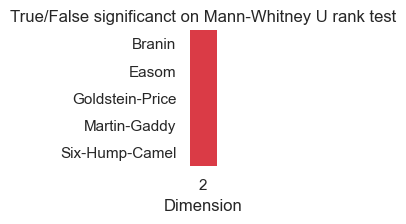

In [130]:
fig = plt.figure(figsize=(5,3))

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5,3), gridspec_kw={'width_ratios': [4, 1]})
nd_stats = stats_df[~(stats_df['benchmark'].isin(['branin','easom','goldstein_price','martin_gaddy','six_hump_camel']))]
nd_stats.benchmark = nd_stats.benchmark.replace(pretty_names)
nd_stats['greater_than'] = pd.to_numeric(nd_stats['greater_than'])
heatmap_data = nd_stats[['benchmark', 'dimensions','greater_than']].pivot(index='benchmark', columns='dimensions', values='greater_than')
rdgn = sns.diverging_palette(10,130, as_cmap=True)
sns.heatmap(heatmap_data, cmap=rdgn, cbar=False, square=True) 
plt.xlabel('Dimensions')
plt.ylabel('Benchmark')
plt.title('n-D')
plt.show()

fig = plt.figure(figsize=(5,2.4))

d2_stats = stats_df[(stats_df['benchmark'].isin(['branin','easom','goldstein_price','martin_gaddy','six_hump_camel']))]
d2_stats.benchmark = d2_stats.benchmark.replace(pretty_names)
d2_stats['greater_than'] = pd.to_numeric(d2_stats['greater_than'])
heatmap_data = d2_stats[['benchmark', 'dimensions','greater_than']].pivot(index='benchmark', columns='dimensions', values='greater_than')
#adding extra rows so the height is the same, photoshop this out
# heatmap_data = heatmap_data.append(heatmap_data[:-1], ignore_index=True)
rdgn = sns.diverging_palette(10,130, as_cmap=True)
sns.heatmap(heatmap_data, cmap=rdgn, cbar=False, square=True)
plt.ylabel('') 
plt.xlabel('Dimension')
plt.title('2-D')

plt.title('True/False significanct on Mann-Whitney U rank test')
# plt.title('Significanct in Mann-Whitney U rank test')
plt.tight_layout()
plt.show()



In [84]:
# new_set = set_1

In [114]:
my_df.benchmark.unique()

array(['ackley', 'branin', 'cigar', 'easom', 'ellipse', 'goldstein_price',
       'griewank', 'martin_gaddy', 'rastrigin', 'rosenbrock', 'schwefel',
       'six_hump_camel', 'sphere', 'tablet'], dtype=object)

In [137]:
a =my_df[(my_df['benchmark'] == 'rosenbrock') & (my_df['dimensions'] == 2)]

In [143]:
an = new_df[(new_df['benchmark'] == 'rosenbrock') & (new_df['dimensions'] == 2)]

In [144]:
aw = wouter_df[(wouter_df['benchmark'] == 'rosenbrock') & (wouter_df['dimensions'] == 2)]

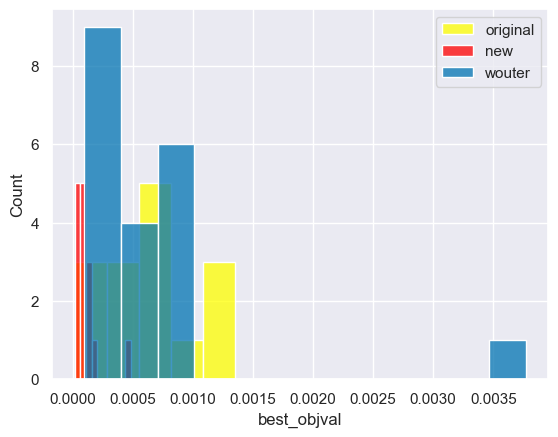

In [145]:
sns.histplot(a.best_objval, label='original', color='yellow')
sns.histplot(an.best_objval, label='new', color='red')
sns.histplot(aw.best_objval, label='wouter')
plt.legend()
plt.show()

In [141]:
a

,run_n,benchmark,dimensions,best_objval
532,4,rosenbrock,2,0.001090
533,3,rosenbrock,2,0.000202
534,2,rosenbrock,2,0.000733
535,14,rosenbrock,2,0.000578
536,13,rosenbrock,2,0.000779
537,12,rosenbrock,2,0.000350
538,11,rosenbrock,2,0.000516
539,10,rosenbrock,2,0.000230
540,1,rosenbrock,2,0.000737
552,5,rosenbrock,2,0.000336


In [142]:
an

,benchmark,dimensions,best_objval,run_n
690,six_hump_camel,2,-1.031622,0
691,six_hump_camel,2,-1.031628,10
692,six_hump_camel,2,-1.031618,11
693,six_hump_camel,2,-1.031625,12
694,six_hump_camel,2,-1.031623,13
695,six_hump_camel,2,-1.031625,14
696,six_hump_camel,2,-1.031615,1
697,six_hump_camel,2,-1.031590,2
698,six_hump_camel,2,-1.031617,3
699,six_hump_camel,2,-1.031622,4


In [133]:
aw

,run_n,benchmark,dimensions,best_objval
1160,1,six_hump_camel,2,-1.031618
1161,10,six_hump_camel,2,-1.031586
1162,11,six_hump_camel,2,-1.031595
1163,12,six_hump_camel,2,-1.031582
1164,13,six_hump_camel,2,-1.031583
1165,14,six_hump_camel,2,-1.031628
1166,15,six_hump_camel,2,-1.031547
1167,16,six_hump_camel,2,-1.031626
1168,17,six_hump_camel,2,-1.031597
1169,18,six_hump_camel,2,-1.031627


In [90]:
thesis_test = my_df[(my_df['benchmark'] == 'ackley') & (my_df['dimensions'] == 100)]

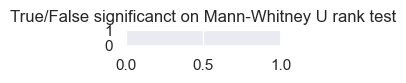

In [14]:
plt.figure(figsize=(2, 0.2))
plt.title('True/False significanct on Mann-Whitney U rank test')
plt.show()

In [98]:
np.mean(new_set['best_objval'])

20.594012129395352

In [99]:
np.mean(thesis_set['best_objval'])

18.926150648682587

In [100]:
np.mean(set_2['best_objval'])

20.657551976394675